In [1]:
# Joel Embiid 2023
# Nikola Jokić 2022
# Nikola Jokić 2021
# Giannis Antetokounmpo 2020
# Giannis Antetokounmpo 2019
# James Harden 2018
# Russell Westbrook 2017
# Stephen Curry 2016
# Stephen Curry 2015
# Kevin Durant 2014
# LeBron James 2013

In [52]:
from nba_api.stats.endpoints import leagueleaders
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from nba_api.stats.endpoints import leaguedashplayerstats, playercareerstats
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, DrawingArea, TextArea
from matplotlib.patches import Circle, FancyArrowPatch, FancyArrow, ArrowStyle, Arrow
import matplotlib.ticker as mtick
import time
from tqdm import tqdm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.style.use('fivethirtyeight')

/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_60248/2917817599.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [38]:
%matplotlib inline

In [3]:
mvps_dict = {}

with open('last_10_mvps.txt', 'r') as file:
    for line in file.readlines():
        line = line.rstrip()
        name, season, id_ = line.split('/')
        mvps_dict[season] = name, id_

In [4]:
mvps_dict

{'2022-23': ('Joel Embiid', '203954'),
 '2021-22': ('Nikola Jokić', '203999'),
 '2020-21': ('Nikola Jokić', '203999'),
 '2019-20': ('Giannis Antetokounmpo', '203507'),
 '2018-19': ('Giannis Antetokounmpo', '203507'),
 '2017-18': ('James Harden', '201935'),
 '2016-17': ('Russell Westbrook', '201566'),
 '2015-16': ('Stephen Curry', '201939'),
 '2014-15': ('Stephen Curry', '201939'),
 '2013-14': ('Kevin Durant', '201142'),
 '2012-13': ('LeBron James', '2544')}

In [14]:
mvps_ppg_by_season = {}

for season, (player_name, id_) in tqdm(mvps_dict.items()):
    
    id_ = int(id_)
    
    regular_all_players = leaguedashplayerstats.LeagueDashPlayerStats(per_mode_detailed='PerGame', season=season, season_type_all_star='Regular Season').get_data_frames()[0]
    
    time.sleep(0.5)
    
    advanced_regular_all_players = leaguedashplayerstats.LeagueDashPlayerStats(measure_type_detailed_defense='Advanced', per_mode_detailed='PerGame', season=season, season_type_all_star='Regular Season').get_data_frames()[0]
    regular_all_players = pd.merge(regular_all_players, advanced_regular_all_players, on=["PLAYER_ID", "TEAM_ID", 'PLAYER_NAME'])
    time.sleep(0.5)
    
    playoff_all_players = leaguedashplayerstats.LeagueDashPlayerStats(per_mode_detailed='PerGame', season=season, season_type_all_star='Playoffs').get_data_frames()[0]
    
    time.sleep(0.5)
    
    advanced_playoff_all_players = leaguedashplayerstats.LeagueDashPlayerStats(measure_type_detailed_defense='Advanced', per_mode_detailed='PerGame', season=season, season_type_all_star='Playoffs').get_data_frames()[0]
    playoff_all_players = pd.merge(playoff_all_players, advanced_playoff_all_players, on=["PLAYER_ID", "TEAM_ID", 'PLAYER_NAME'])
    time.sleep(0.5)
    
    regular_ppg = regular_all_players[regular_all_players['PLAYER_ID'] == id_].PTS
    playoff_ppg = playoff_all_players[playoff_all_players['PLAYER_ID'] == id_].PTS
    
    mvps_ppg_by_season[season] = [player_name, id_, regular_ppg, playoff_ppg]
    
    time.sleep(0.5)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.59s/it]


In [16]:
mvps_ppg_by_season

{'2022-23': ['Joel Embiid',
  203954,
  252    33.1
  Name: PTS, dtype: float64,
  102    23.7
  Name: PTS, dtype: float64],
 '2021-22': ['Nikola Jokić',
  203999,
  449    27.1
  Name: PTS, dtype: float64,
  160    31.0
  Name: PTS, dtype: float64],
 '2020-21': ['Nikola Jokić',
  203999,
  399    26.4
  Name: PTS, dtype: float64,
  173    29.8
  Name: PTS, dtype: float64],
 '2019-20': ['Giannis Antetokounmpo',
  203507,
  178    29.5
  Name: PTS, dtype: float64,
  67    26.7
  Name: PTS, dtype: float64],
 '2018-19': ['Giannis Antetokounmpo',
  203507,
  179    27.7
  Name: PTS, dtype: float64,
  70    25.5
  Name: PTS, dtype: float64],
 '2017-18': ['James Harden',
  201935,
  218    30.4
  Name: PTS, dtype: float64,
  82    28.6
  Name: PTS, dtype: float64],
 '2016-17': ['Russell Westbrook',
  201566,
  403    31.6
  Name: PTS, dtype: float64,
  178    37.4
  Name: PTS, dtype: float64],
 '2015-16': ['Stephen Curry',
  201939,
  421    30.1
  Name: PTS, dtype: float64,
  189    25.1
  

/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_60248/1647688720.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  regular_ppg = float(regular_ppg)
/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_60248/1647688720.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  playoff_ppg = float(playoff_ppg)


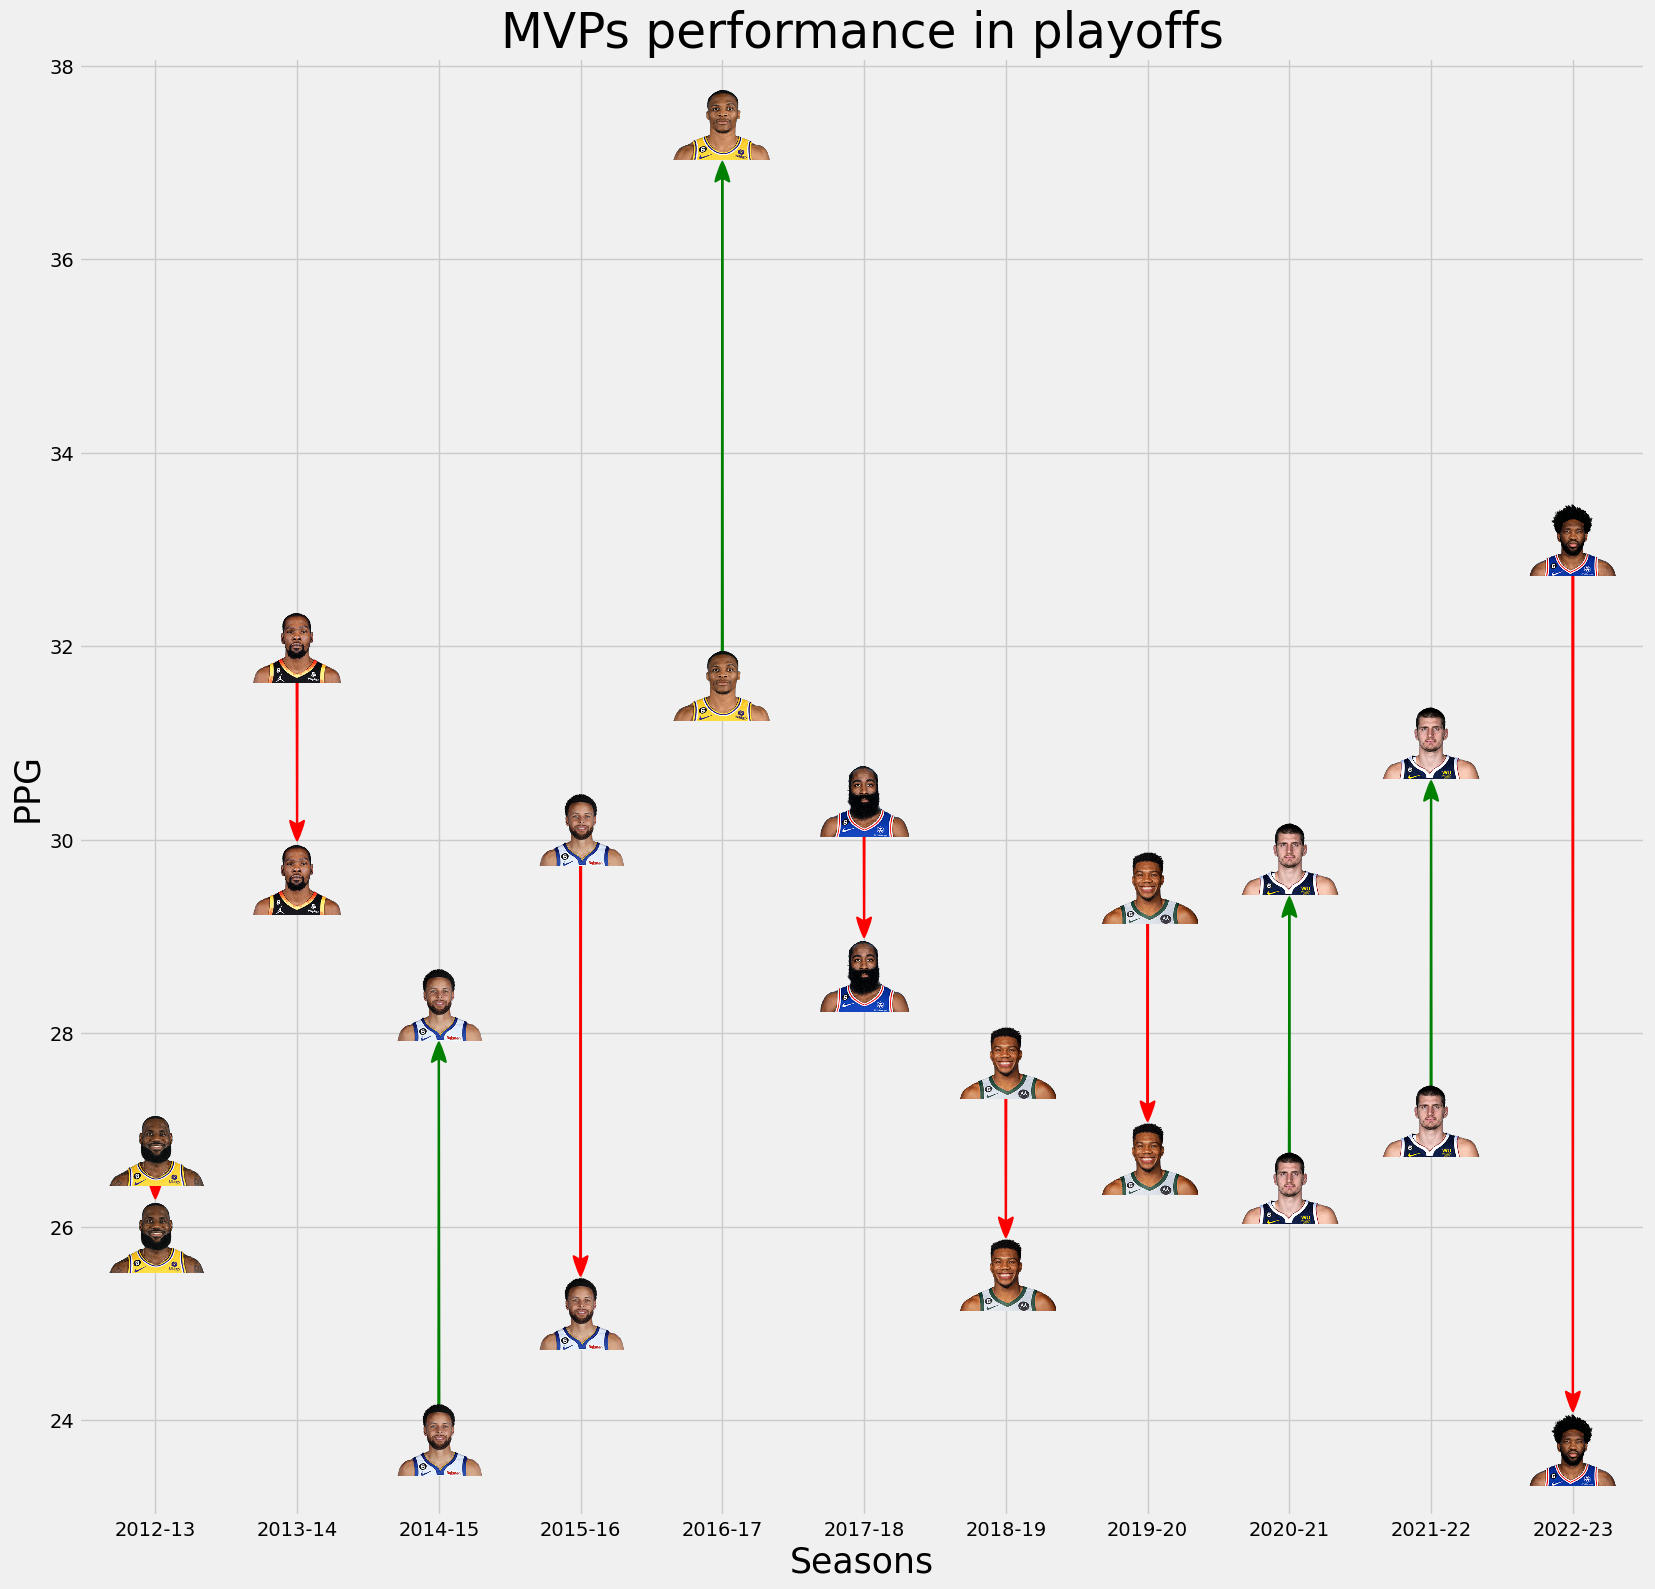

In [51]:
zoom = 0.275
player_root_dir = 'player_imgs/'

def get_player_img(player_id):
    #print(path)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)

fig, ax = plt.subplots(figsize=(18, 18))

for season, (player_name, id_, regular_ppg, playoff_ppg) in mvps_ppg_by_season.items():
    
    season = int(season.split('-')[1])
    regular_ppg = float(regular_ppg)
    playoff_ppg = float(playoff_ppg)

    ax.scatter(season, regular_ppg)
    ax.scatter(season, playoff_ppg)
            
    A = season, regular_ppg
    B = season, playoff_ppg
    
    if B[1] > A[1]:
        color = 'g'
    else:
        color = 'r'
    
    style = ArrowStyle('Fancy', head_length=7, head_width=5)
    arrow = FancyArrowPatch(A, B, mutation_scale=2, arrowstyle=style, color=color, shrinkB=27.5, linewidth=1.5)                     
    ax.add_patch(arrow)
    
    ab_regular = AnnotationBbox(get_player_img(id_), (season, regular_ppg), frameon=False)
    ab_playoff = AnnotationBbox(get_player_img(id_), (season, playoff_ppg), frameon=False)
    ax.add_artist(ab_regular)
    ax.add_artist(ab_playoff)
    
ax.set_xlabel("Seasons", fontsize=25)
ax.set_ylabel("PPG", fontsize=25)
ax.set_xticks([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
ax.set_xticklabels(reversed(list(mvps_dict.keys())))
# ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("MVPs performance in playoffs", fontdict={'fontsize': 35})

plt.savefig('mvp_scoring_in_playoffs.png', bbox_inches='tight')